### 6.1.1 Brute force root finding 

Implementation. 

Given some Python implementation f(x) of our mathmatical function, a straightforward implementation of the above numerical algorithm looks like

Find (the first) root as x=0.392699082012224
Exact Value of running example exp(-x**2)*cos(4x) : 0.392699081698724
Error value of running example exp(-x**2)*cos(4x) : 0.000000000313500


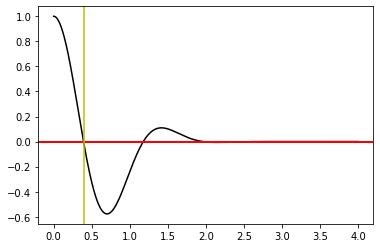

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 4, 100001) # 1001, 10001, 100001
#y = x**2-5*x+3
#y = np.sin(x+1)
y = np.exp(-x**2)*np.cos(4*x)

root = None # Initialization
for i in range(len(x)-1):
    if y[i]*y[i+1] < 0:
        root = np.float64(x[i]) - np.float64((x[i+1]-x[i])/(y[i+1]-y[i])*y[i])
        break # Jump out of loop
        
if root is None:
    print('Could not find any root in [%2.15f, %2.15f]' % (x[0],x[-1]))
else:
    print('Find (the first) root as x=%2.15f' % root)
    
Exact_Value = np.float64(np.pi / 8)
print('Exact Value of running example exp(-x**2)*cos(4x) : %2.15f' % (Exact_Value))

Error = np.float64(root - Exact_Value)
print('Error value of running example exp(-x**2)*cos(4x) : %2.15f' % (Error))
# Plotting for x,y

plt.plot(x, y, color='k')
plt.axhline(linewidth=2, color='r')
plt.axvline(root, color='y')

#plt.xlim(3.6,3.72)
#plt.ylim(-0.000001, 0.000001)

plt.show()    
    

Let's make a general pythons script for root finder.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def brute_force_root_finder(f, a, b, n):
    x = np.linspace(a, b, n)
    y = f(x)
    roots = []
    for i in range(n-1):
        if y[i]*y[i+1] < 0:
            root = x[i] - (x[i+1] - x[i])/(y[i+1] - y[i])*y[i]
            roots.append(root)
    return roots

def demo():
    roots = brute_force_root_finder(
        lambda x: np.exp(-x**2)*np.cos(4*x), 0, 4, 10001)
    if roots:
        print(roots)
    else:
        print('Cold not find any roots')

if __name__ == '__main__':
    demo()


[0.392699105380481, 1.178097314504897, 1.9634955297596484, 2.748893729644069, 3.534291958381115]
